In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

# Load Cleaned Data

In [2]:
trips = pd.read_csv('./Data/trips.csv') 
trips.head()

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Checkout_Hour,Checkout_Min,Year_2,Month_2,Weekday
0,0,9900285854,Annual (San Antonio B-cycle),207.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10.0,2014.0,13,12,2014,10,6
1,1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10.0,2014.0,13,12,2014,10,6
2,2,9900285856,Annual Membership (Austin B-cycle),214.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,10.0,2014.0,13,12,2014,10,6
3,3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,10/26/2014,13:12:00,2574.0,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10.0,2014.0,13,12,2014,10,6
4,4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0,13,12,2014,10,6


In [3]:
trips['Year_2']

0          2014
1          2014
2          2014
3          2014
4          2014
           ... 
1402979    2021
1402980    2021
1402981    2021
1402982    2021
1402983    2021
Name: Year_2, Length: 1402984, dtype: int64

In [4]:
trips_recent = trips.loc[trips['Year_2'].isin([2017,2018,2019,2020])]
trips_recent.head()

,Unnamed: 0,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Checkout_Hour,Checkout_Min,Year_2,Month_2,Weekday
177,182,14713922,Walk Up,663.0,05/07/2017,11:48:43,3619.0,6th & Congress,2574.0,Zilker Park,38,5.0,2017.0,11,48,2017,5,6
269,275,14702566,Walk Up,203.0,05/06/2017,12:34:28,3619.0,6th & Congress,2574.0,Zilker Park,21,5.0,2017.0,12,34,2017,5,5
478,490,13583062,Walk Up,385.0,01/30/2017,14:54:23,2501.0,5th & Bowie,2501.0,5th & Bowie,55,1.0,2017.0,14,54,2017,1,0
600,618,14642408,Walk Up,276.0,05/01/2017,13:58:39,2707.0,Rainey St @ Cummings,2574.0,Zilker Park,78,5.0,2017.0,13,58,2017,5,0
685,704,14855185,Walk Up,936.0,05/19/2017,14:35:08,2572.0,Barton Springs Pool,2574.0,Zilker Park,25,5.0,2017.0,14,35,2017,5,4


In [5]:
kiosk = pd.read_csv('./Data/kiosk.csv') 
kiosk.head()

,Unnamed: 0,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,...,Num_Rides_2021,UsedIn_2013,UsedIn_2014,UsedIn_2015,UsedIn_2016,UsedIn_2017,UsedIn_2018,UsedIn_2019,UsedIn_2020,UsedIn_2021
0,0,2570,South Congress & Academy,active,"(30.25226, -97.74854)",1199 S. Congress Ave.,NaN,16752.0,sidewalk,10.0,...,11322.0,0,1,1,1,1,1,1,1,1
1,1,2571,Red River & 8th Street,active,"(30.26854, -97.73646)",761 Red River St.,NaN,16760.0,sidewalk,13.0,...,14637.0,0,1,1,1,1,1,1,1,1
2,2,2572,Barton Springs Pool,active,"(30.26452, -97.7712)",2200 William Barton Dr.,NaN,16758.0,parkland,13.0,...,20213.0,0,1,1,1,1,1,1,1,1
3,3,2574,Zilker Park,active,"(30.2659, -97.76822)",Barton Springs Rd,Zilker Park at Barton Springs and William Burt...,16759.0,parkland,17.0,...,47209.0,0,1,1,1,1,1,1,1,1
4,4,2575,Riverside @ S. Lamar,active,"(30.26446, -97.75665)",Presented by Austin Parks Foundation,NaN,16736.0,parkland,15.0,...,50201.0,0,1,1,1,1,1,1,1,1


In [6]:
survey_2019 = pd.read_csv('./Data/survey.csv') 
survey_2019.head()

,Unnamed: 0,ID,Year,Method,The City of Austin as a place to live,The City of Austin as a place to work,The City of Austin as a place to raise children,The City of Austin as a place to retire,The City of Austin as a place where I feel welcome,Overall quality of life in the city,...,"Q25 - If there was one thing you could share with the Mayor regarding the City of Austin (any comment, suggestion, etc.), what would it be?",Q25 - One thing to share with Mayor Topics,Quality of Life Topics,Economic Opportunity and Affordability Topics,Mobility Topics,Health and the Environment Topics,Safety Topics,Government That Works for All Topics,Culture and Lifelong Learning Topics,Share with the Mayor Topics
0,6374,2019_7610,2019,NaN,Satisfied,Satisfied,Satisfied,Dissatisfied,Dissatisfied,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6380,2019_5735,2019,NaN,Satisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6381,2019_6738,2019,Web,Dissatisfied,Neutral,Don't Know,Dissatisfied,Satisfied,Dissatisfied,...,NaN,NaN,Cost of Living,NaN,Roadways,NaN,Emergency Services,NaN,NaN,NaN
3,6382,2019_5604,2019,NaN,Very Dissatisfied,Neutral,Neutral,Very Dissatisfied,Dissatisfied,Dissatisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6384,2019_5665,2019,Mail,Satisfied,Neutral,Satisfied,Satisfied,Very Satisfied,Satisfied,...,"BUILD LIGHT RAIL, AFFORDABLE HOUSING, FIX 1ST ...",NaN,NaN,Housing,NaN,Homelessness,NaN,NaN,NaN,"Cost of Living,Housing,Public Transit"


# Visualizations

In [7]:
QuestX = 'Transportation options (aside from personal vehicle) to get around Austin (e.g. ride share, but/train, bike, walk)'
transp_opts = survey_2019[QuestX]

In [8]:
transp_opts.value_counts()

Neutral              527
Very Dissatisfied    439
Dissatisfied         415
Satisfied            348
Don't Know           233
Very Satisfied        87
Name: Transportation options (aside from personal vehicle) to get around Austin (e.g. ride share, but/train, bike, walk), dtype: int64

<ipython-input-9-b22725e58226>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


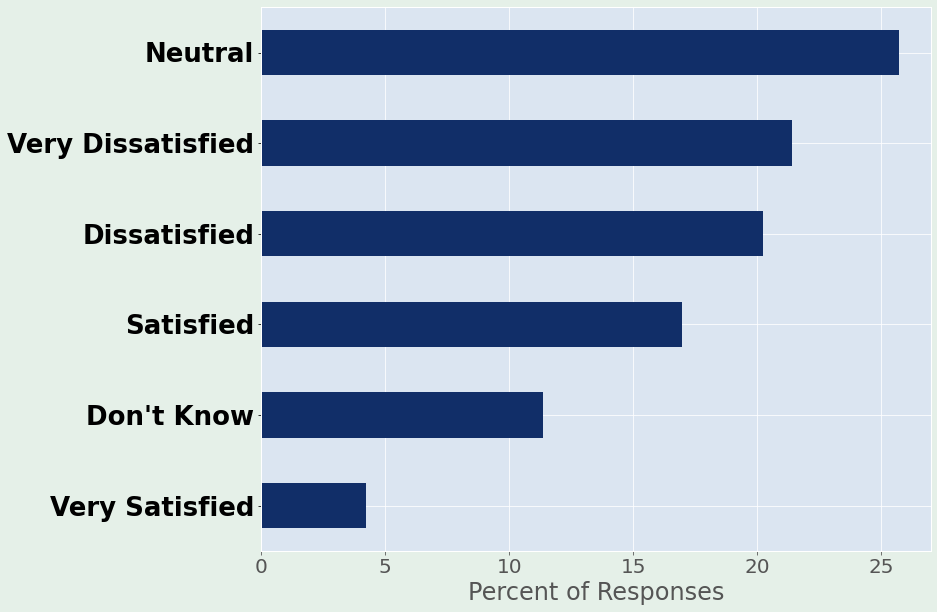

In [9]:
fig = plt.figure(figsize = (12,10))
((survey_2019.groupby(QuestX).size()/sum(transp_opts.value_counts()))*100).sort_values(ascending=True).plot.barh(
    color = '#112e68')

#from matplotlib.patches import Rectangle
#currentAxis = plt.gca()
#currentAxis.add_patch(Rectangle((0.12, 2.5), 21.75, 2, facecolor="none", ec='r', lw=7))

ax = plt.axes() 
ax.tick_params(axis='y', colors='black')
ax.set_facecolor('#dbe5f1')

plt.xlabel('Percent of Responses')
plt.ylabel('')
plt.yticks(fontsize=26, weight = 'bold')

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-10-94ae51804711>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


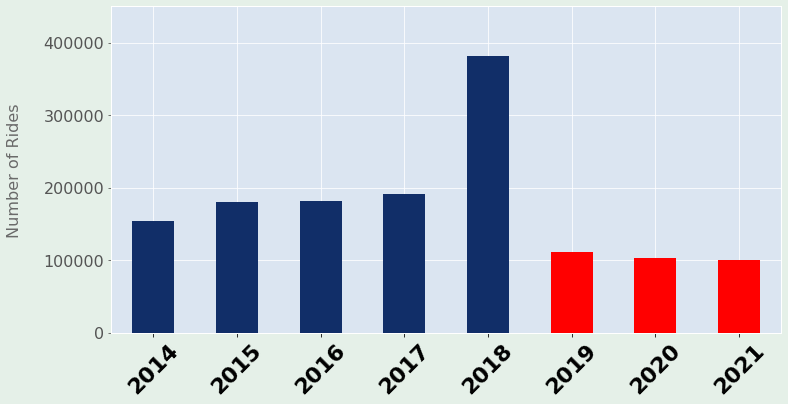

In [10]:
clrs = ['#112e68' if (x > 120000) else 'red' for x in trips.groupby('Year_2').size()]

fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2').size().plot.bar(color = clrs)

ytemp = 12000
#plt.text(8,(100702+ytemp),
#         "100702",horizontalalignment='center',fontsize=16) #2021
#plt.text(7,(102334+ytemp),
#         "102334",horizontalalignment='center',fontsize=16) #2020
#plt.text(6,(111409+ytemp),
#         "111409",horizontalalignment='center',fontsize=16) #2019
#plt.text(5,(390488+ytemp),
#         "390488",horizontalalignment='center',fontsize=16) #2018
#plt.text(4,(193492+ytemp),
#         "193492",horizontalalignment='center',fontsize=16) #2017

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1')
#ax.spines['bottom'].set_color('black')
#ax.spines['left'].set_color('black')

plt.ylabel('Number of Rides\n',fontsize=16,color='#6A6A6A',rotation=90)
plt.xlabel('')
plt.ylim(0,450000)
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks(fontsize=16)
plt.yticks([0,100000,200000,300000,400000])
plt.xlim(0.5,8.5)
#import matplotlib.ticker as ticker
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

In [11]:
trips.groupby('Year_2')['Bicycle ID'].nunique()

Year_2
2013      83
2014     375
2015     392
2016     396
2017     428
2018    1037
2019     548
2020     702
2021     788
Name: Bicycle ID, dtype: int64

<ipython-input-12-2a001bf6408d>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


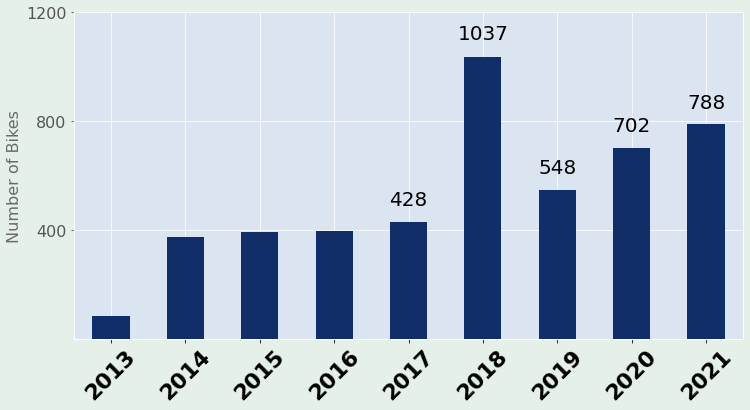

In [12]:
fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2')['Bicycle ID'].nunique().plot.bar(
    color = '#112e68')

plt.text(4,489,"428",horizontalalignment='center') #2017
plt.text(5,1100,"1037",horizontalalignment='center') #2018
plt.text(6,610,"548",horizontalalignment='center') #2019
plt.text(7,763,"702",horizontalalignment='center') #2020
plt.text(8,849,"788",horizontalalignment='center') #2021

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1') 
#ax.xaxis.tick_top()

plt.ylabel('Number of Bikes',fontsize=16,color='#6A6A6A')
plt.xlabel('')
plt.ylim(0,1200)
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks([400,800,1200])
plt.yticks(fontsize=16)

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

In [13]:
trips.groupby('Year_2')['Checkout Kiosk ID'].nunique()

Year_2
2013    11
2014    50
2015    55
2016    57
2017    58
2018    78
2019    76
2020    76
2021    76
Name: Checkout Kiosk ID, dtype: int64

<ipython-input-14-084c7c779c33>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


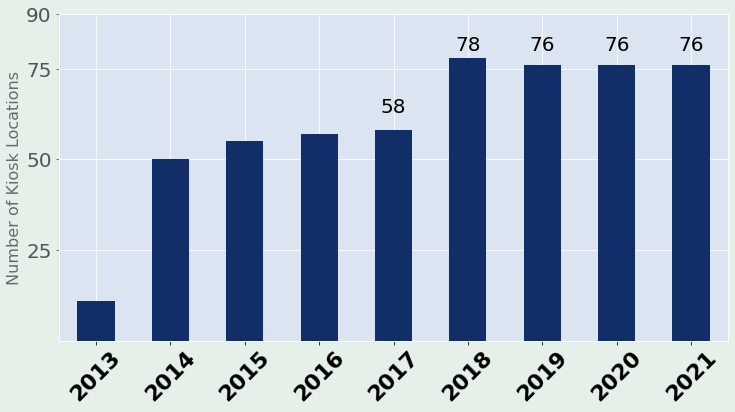

In [14]:
fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2')['Checkout Kiosk ID'].nunique().plot.bar(
    color = '#112e68')

plt.text(4,63,"58",horizontalalignment='center') #2017
plt.text(5,80,"78",horizontalalignment='center') #2018
plt.text(6,80,"76",horizontalalignment='center') #2019
plt.text(7,80,"76",horizontalalignment='center') #2020
plt.text(8,80,"76",horizontalalignment='center') #2021

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1') 

plt.ylabel('Number of Kiosk Locations',fontsize=16,color='#6A6A6A')
plt.xlabel('')
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks([25,50,75,90])

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

In [15]:
trips.groupby('Year_2')['Membership Type'].nunique()

Year_2
2013     8
2014    30
2015    25
2016    24
2017    18
2018    28
2019    27
2020    19
2021    13
Name: Membership Type, dtype: int64

<ipython-input-16-01cb4dfb4062>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


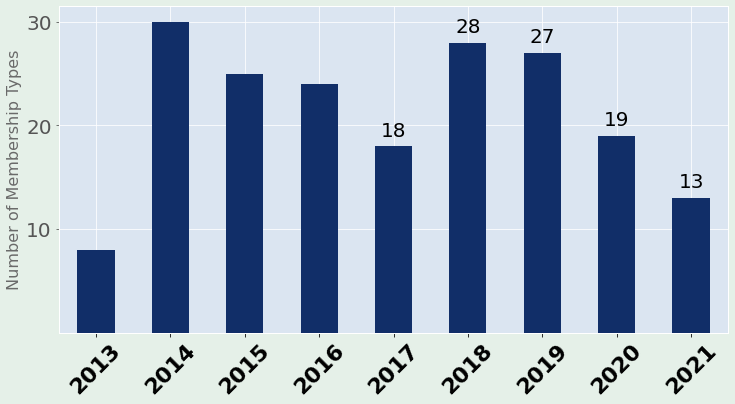

In [16]:
fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2')['Membership Type'].nunique().plot.bar(
    color = '#112e68')

plt.text(4,19,"18",horizontalalignment='center') #2017
plt.text(5,29,"28",horizontalalignment='center') #2018
plt.text(6,28,"27",horizontalalignment='center') #2019
plt.text(7,20,"19",horizontalalignment='center') #2020
plt.text(8,14,"13",horizontalalignment='center') #2021

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1') 

plt.ylabel('Number of Membership Types',fontsize=16,color='#6A6A6A')
plt.xlabel('')
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks([10, 20, 30])

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-17-e06d925e2beb>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


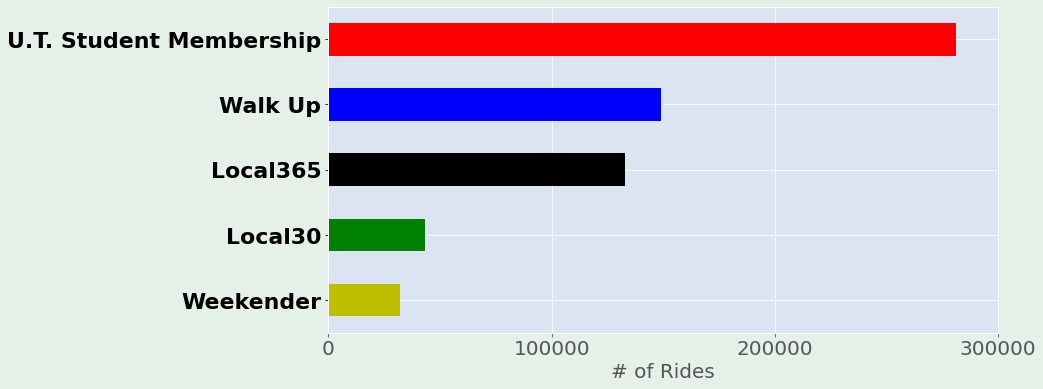

In [17]:
my_colors = list('ygkbr')
fig = plt.figure(figsize = (12,6))
trips_recent.groupby(
    ['Membership Type']).size().nlargest(5).sort_values(
    ascending=True).plot.barh(color = my_colors)

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 
ax.tick_params(axis='y', colors='black')

plt.xlabel('# of Rides',fontsize=20)
plt.yticks(fontsize=22, weight = 'bold')
plt.ylabel('')
plt.xticks([0,100000,200000,300000])

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-18-0072ee843902>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


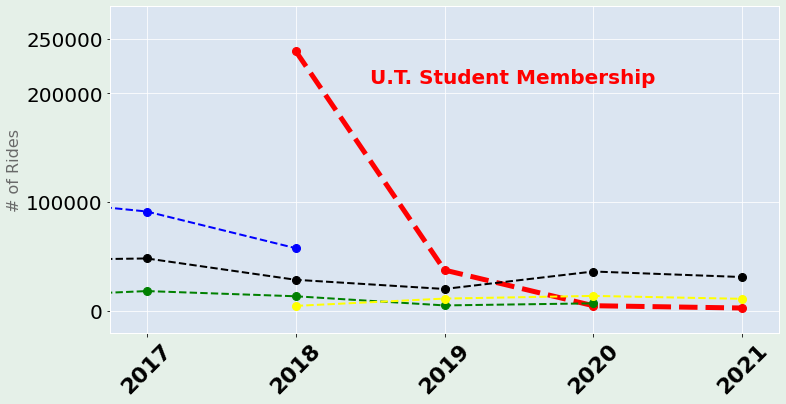

In [18]:
fig = plt.figure(figsize = (12,6))
plt.plot([2018, 2019, 2020, 2021],
         trips.loc[trips['Membership Type'] == 'U.T. Student Membership'].groupby('Year_2').size(),
        color='red', marker='o', linestyle='dashed',linewidth=5, markersize=8)
plt.plot([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
         trips.loc[trips['Membership Type'] == 'Local365'].groupby('Year_2').size(), 
        color='black', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot([2014, 2015, 2016, 2017, 2018],
         trips.loc[trips['Membership Type'] == 'Walk Up'].groupby('Year_2').size(), 
        color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot([2014, 2015, 2016, 2017, 2018, 2019, 2020],
         trips.loc[trips['Membership Type'] == 'Local30'].groupby('Year_2').size(), 
        color='green', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot([2018, 2019, 2020, 2021],
         trips.loc[trips['Membership Type'] == '24 Hour Walk Up Pass'].groupby('Year_2').size(), 
        color='yellow', marker='o', linestyle='dashed',linewidth=2, markersize=8)

plt.text(2018.5,209000,"U.T. Student Membership",color='r',weight = 'bold')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='x', colors='black',rotation=45)

# plt.xlabel('Year')
plt.ylabel('# of Rides',fontsize=16,color='#6A6A6A')
plt.xlim(2016.75,2021.25)
plt.yticks([0,100000,200000,250000])
plt.ylim(-20000,280000)
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=22, weight = 'bold')

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-19-122e4da9a43f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


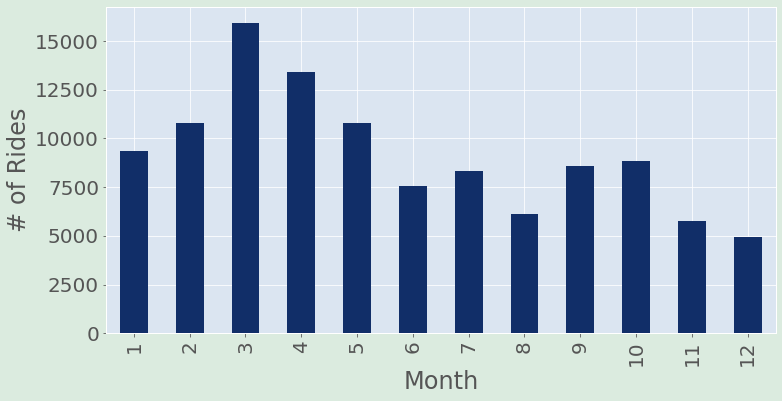

In [19]:
fig = plt.figure(figsize = (12,6))
trips_2019 = trips.loc[trips['Year_2'].isin([2019])]
trips_2019.groupby('Month_2').size().plot.bar(color = '#112e68')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 

plt.ylabel('# of Rides')
plt.xlabel('Month')

fig.patch.set_facecolor('#dbebdf')

<ipython-input-20-c4eff7275c65>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


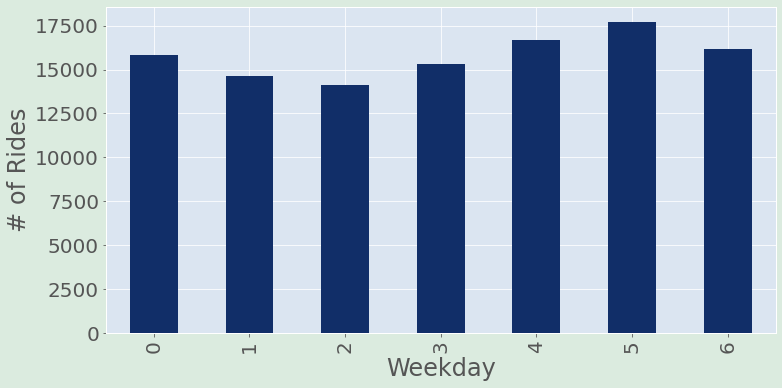

In [20]:
fig = plt.figure(figsize = (12,6))
trips_2019.groupby('Weekday').size().plot.bar(color = '#112e68')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 

plt.ylabel('# of Rides')
plt.xlabel('Weekday')

fig.patch.set_facecolor('#dbebdf')

<ipython-input-21-a8ca338fb15e>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


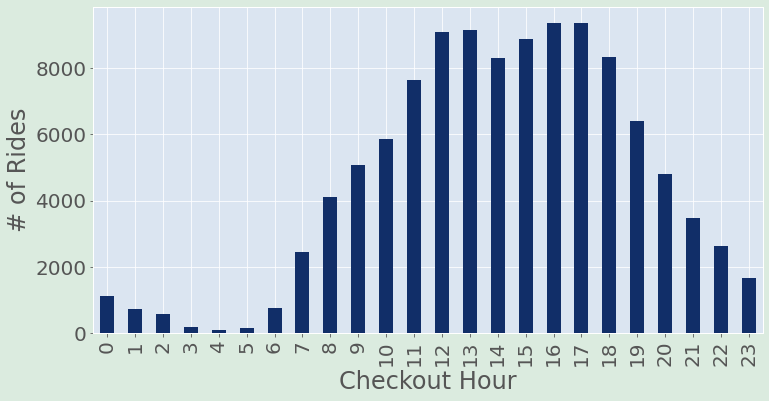

In [21]:
fig = plt.figure(figsize = (12,6))
trips_2019.groupby('Checkout_Hour').size().plot.bar(color = '#112e68')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 

plt.ylabel('# of Rides')
plt.xlabel('Checkout Hour')

fig.patch.set_facecolor('#dbebdf')

Text(0.5, 0, 'Kiosk ID')

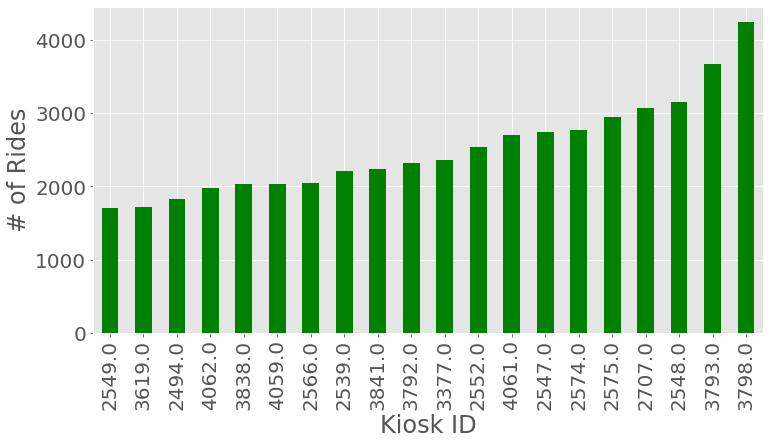

In [22]:
plt.figure(figsize = (12,6))
trips_2021 = trips.loc[trips['Year_2'].isin([2021])]
trips_2021.groupby('Checkout Kiosk ID').size(
        ).nlargest(20).sort_values().plot.bar(color = 'g')

plt.ylabel('# of Rides')
plt.xlabel('Kiosk ID')

In [23]:
trips.loc[trips['Checkout Kiosk ID'] == 2707]

,Unnamed: 0,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Checkout_Hour,Checkout_Min,Year_2,Month_2,Weekday
40,41,9900285895,Annual Membership (Austin B-cycle),55.0,10/26/2014,14:12:00,2707.0,Rainey St @ Cummings,2550.0,Republic Square @ Guadalupe & 4th St.,10,10.0,2014.0,14,12,2014,10,6
64,66,9900285920,Annual Membership (Austin B-cycle),407.0,10/26/2014,14:12:00,2707.0,Rainey St @ Cummings,NaN,Zilker Park at Barton Springs & William Barton...,19,10.0,2014.0,14,12,2014,10,6
145,149,9900286002,24-Hour Kiosk (Austin B-cycle),306.0,10/26/2014,15:12:00,2707.0,Rainey St @ Cummings,2707.0,Rainey St @ Cummings,66,10.0,2014.0,15,12,2014,10,6
147,151,9900286004,24-Hour Kiosk (Austin B-cycle),207.0,10/26/2014,15:12:00,2707.0,Rainey St @ Cummings,2707.0,Rainey St @ Cummings,64,10.0,2014.0,15,12,2014,10,6
170,175,9900286028,24-Hour Kiosk (Austin B-cycle),88.0,10/26/2014,16:12:00,2707.0,Rainey St @ Cummings,2707.0,Rainey St @ Cummings,91,10.0,2014.0,16,12,2014,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402681,1424483,24670835,Local365,16831,07/25/2021,14:46:33,2707.0,Rainey/Cummings,2539,3rd/Trinity @ The Convention Center,23,NaN,NaN,14,46,2021,7,6
1402772,1424574,24688445,Explorer,993,07/27/2021,19:56:02,2707.0,Rainey/Cummings,2707,Rainey/Cummings,47,NaN,NaN,19,56,2021,7,1
1402783,1424585,24690065,Local365,21468,07/28/2021,7:16:24,2707.0,Rainey/Cummings,3621,3rd/Nueces,7,NaN,NaN,7,16,2021,7,2
1402788,1424590,24690695,Local365,19679,07/28/2021,9:28:34,2707.0,Rainey/Cummings,2563,Rainey/Davis,11,NaN,NaN,9,28,2021,7,2


# GeoMaps STuff

In [24]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [25]:
# Neighborhoods Shape File
base_map_neighborhoods = gpd.read_file(
    './data/data_austintexas_gov/Neighborhoods/geo_export_dc98148d-fe86-40df-83c0-be01050282f9.shp')

In [26]:
base_map_neighborhoods.head()

,fid,target_fid,neighname,sqmiles,shape_leng,shape_area,shape_le_2,geometry
0,3.0,3.0,ANDERSON MILL,8.669086,154458.205390,2.416802e+08,154458.205390,"POLYGON ((-97.79231 30.45671, -97.79154 30.452..."
1,95.0,95.0,WINDSOR PARK,2.383074,40527.378654,6.643628e+07,40527.378654,"POLYGON ((-97.67076 30.30854, -97.67204 30.308..."
2,19.0,19.0,DAWSON,0.495535,17697.924998,1.381473e+07,17697.924998,"POLYGON ((-97.75353 30.23876, -97.75472 30.237..."
3,91.0,91.0,WEST UNIVERSITY,0.738442,24981.044476,2.058658e+07,24981.044476,"POLYGON ((-97.73815 30.30275, -97.73860 30.301..."
4,49.0,49.0,MLK,1.545283,33470.415430,4.308001e+07,33470.415430,"POLYGON ((-97.68262 30.28587, -97.68372 30.284..."


In [27]:
loc_full = kiosk['Location']
loc_full
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]

# print(lat_0[1][1:-1])

lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

kiosk["Latitude"] = lat.astype('float')
kiosk["Longitude"] = lon.astype('float')

<ipython-input-27-717bee1454b7>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lat = lat_0.str.replace('(', '')
<ipython-input-27-717bee1454b7>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lon = lon_0.str.replace(')', '')


In [28]:
geometry = [Point(xy) for xy in zip( kiosk["Longitude"], kiosk["Latitude"])]
geometry[:3]

In [29]:
crs = "EPSG:4326"

# create geo-DataFrame
kiosk_geo = gpd.GeoDataFrame(kiosk,crs = crs,
                         geometry = geometry)

# Location of Kiosks

In [30]:
kiosk_geo.head()

,Unnamed: 0,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,...,UsedIn_2015,UsedIn_2016,UsedIn_2017,UsedIn_2018,UsedIn_2019,UsedIn_2020,UsedIn_2021,Latitude,Longitude,geometry
0,0,2570,South Congress & Academy,active,"(30.25226, -97.74854)",1199 S. Congress Ave.,NaN,16752.0,sidewalk,10.0,...,1,1,1,1,1,1,1,30.25226,-97.74854,POINT (-97.74854 30.25226)
1,1,2571,Red River & 8th Street,active,"(30.26854, -97.73646)",761 Red River St.,NaN,16760.0,sidewalk,13.0,...,1,1,1,1,1,1,1,30.26854,-97.73646,POINT (-97.73646 30.26854)
2,2,2572,Barton Springs Pool,active,"(30.26452, -97.7712)",2200 William Barton Dr.,NaN,16758.0,parkland,13.0,...,1,1,1,1,1,1,1,30.26452,-97.77120,POINT (-97.77120 30.26452)
3,3,2574,Zilker Park,active,"(30.2659, -97.76822)",Barton Springs Rd,Zilker Park at Barton Springs and William Burt...,16759.0,parkland,17.0,...,1,1,1,1,1,1,1,30.26590,-97.76822,POINT (-97.76822 30.26590)
4,4,2575,Riverside @ S. Lamar,active,"(30.26446, -97.75665)",Presented by Austin Parks Foundation,NaN,16736.0,parkland,15.0,...,1,1,1,1,1,1,1,30.26446,-97.75665,POINT (-97.75665 30.26446)


In [31]:
# x and y limits
perct = 0.48
xdelta = ((1.00-perct)/2)*0.17
ydelta = ((1.00-perct)/2)*0.125

# x and y ticks
perct2 = 0.70
ylo = (30.207+ydelta)
yhi = (30.332-ydelta)
ylen = yhi-ylo
ymid = (ylen/2)+ylo
ytickhi = ymid + (perct2*(ylen/2))
yticklo = ymid - (perct2*(ylen/2))
print(yticklo, ytickhi)

xlo = (-97.83+xdelta)
xhi = (-97.66-xdelta)
xlen = xhi-xlo
xmid = (xlen/2)+xlo
xtickhi = xmid + (perct2*(xlen/2))
xticklo = xmid - (perct2*(xlen/2))
print(xticklo, xtickhi)

30.2485 30.2905
-97.77356 -97.71644


Text(0.5, 1.0, '2017')

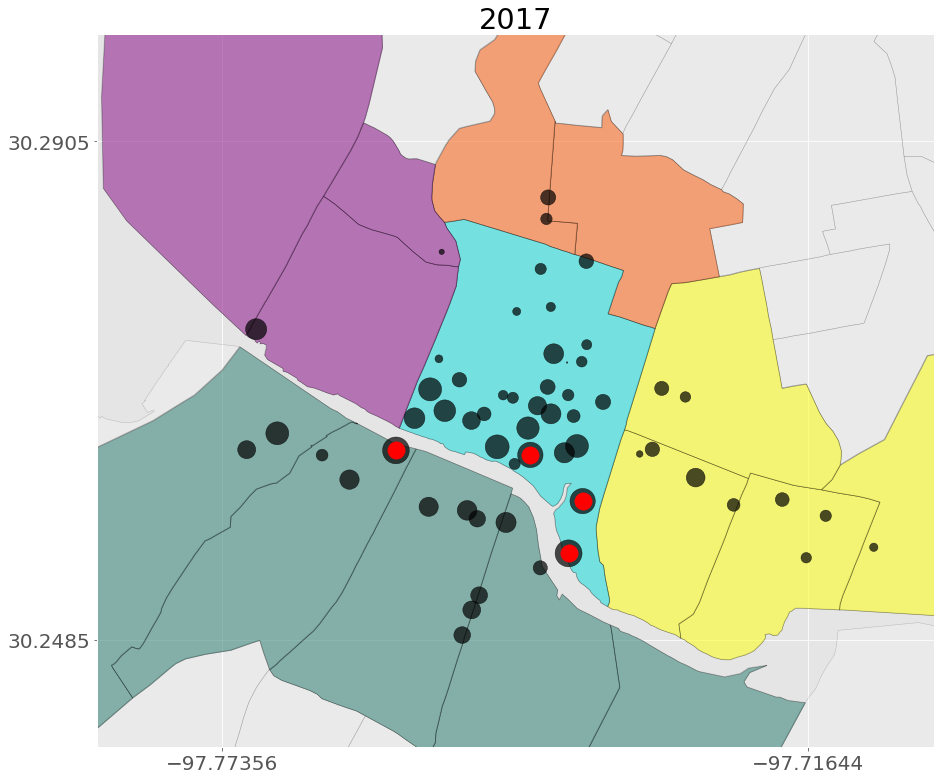

In [32]:
markersize = kiosk_geo['Num_Rides_2017']/200

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#00D8D8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2707].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2575].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2494].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2563].plot(
    ax = ax, color="red",markersize=300, alpha=1)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)
ax.set_xticks([xticklo, xtickhi])
ax.set_yticks([yticklo, ytickhi])

ax.set_title('2017')

#fig.patch.set_facecolor('#dbebdf')

Text(0.5, 1.0, '2018')

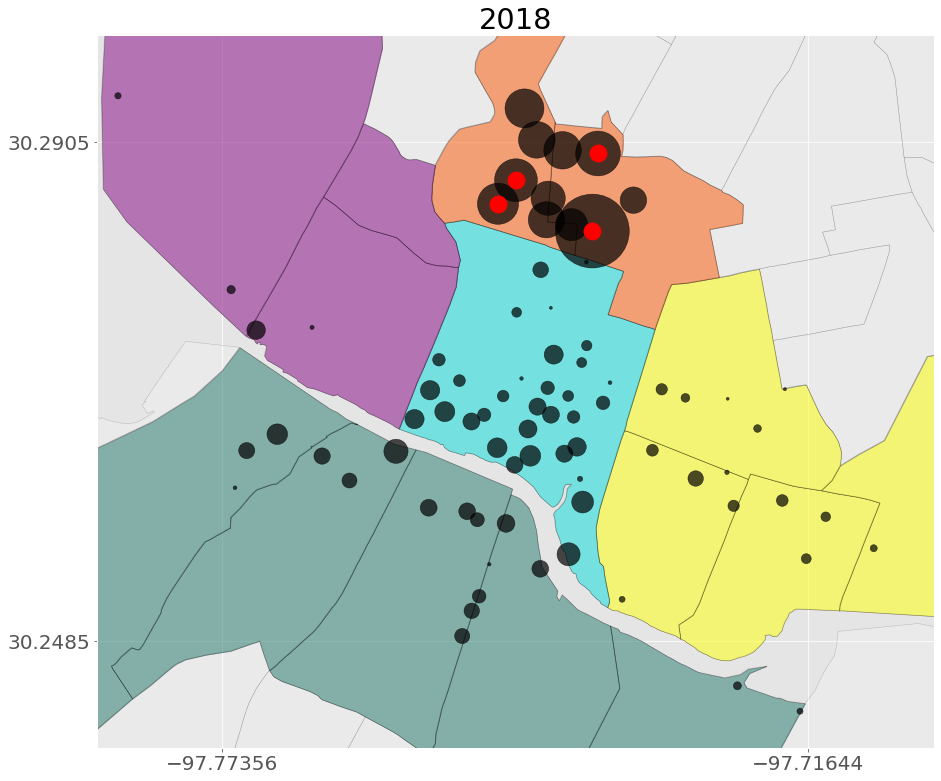

In [33]:
markersize = kiosk_geo['Num_Rides_2018']/200

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#00D8D8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3798].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3841].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3792].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3794].plot(
    ax = ax, color="red",markersize=300, alpha=1)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)
ax.set_xticks([xticklo, xtickhi])
ax.set_yticks([yticklo, ytickhi])

ax.set_title('2018')

#fig.patch.set_facecolor('#dbebdf')

Text(0.5, 1.0, '2019')

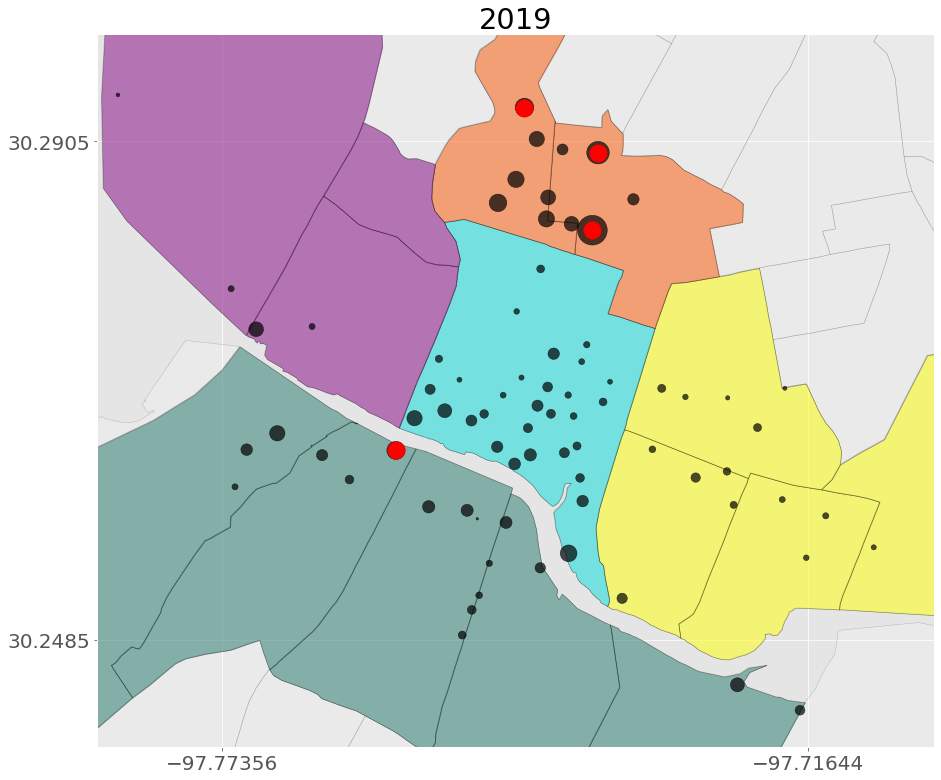

In [34]:
markersize = kiosk_geo['Num_Rides_2019']/200

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#00D8D8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)

kiosk_geo[kiosk_geo['Kiosk ID'] == 3798].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3794].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3793].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2575].plot(
    ax = ax, color="red",markersize=300, alpha=1)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)
ax.set_xticks([xticklo, xtickhi])
ax.set_yticks([yticklo, ytickhi])

ax.set_title('2019')

#fig.patch.set_facecolor('#dbebdf')


Text(0.5, 1.0, '2020')

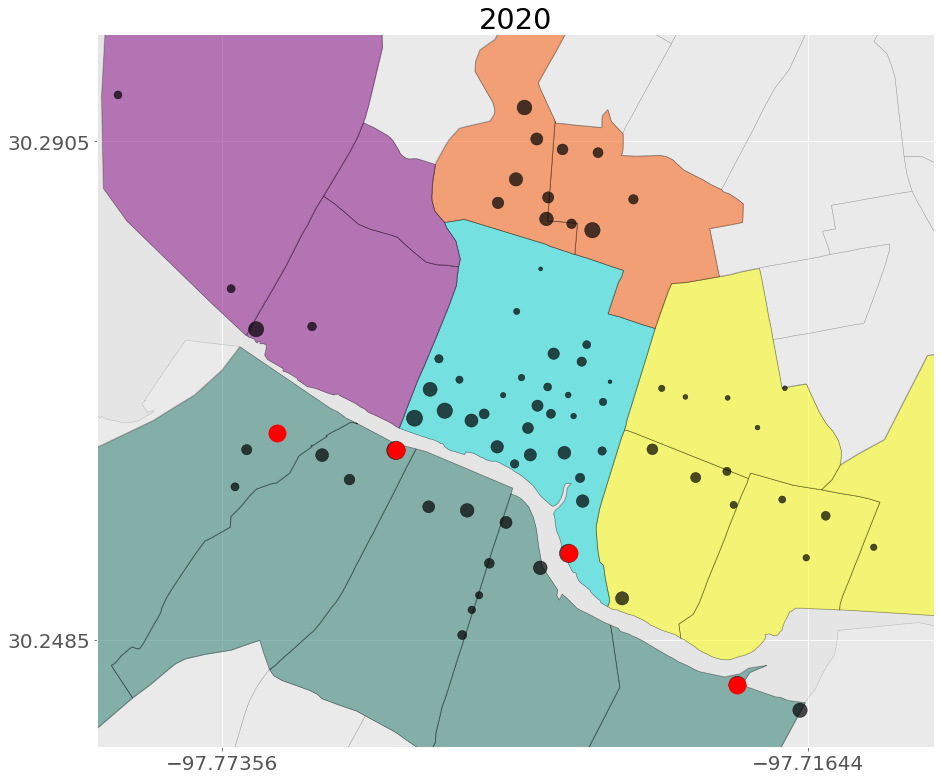

In [35]:
markersize = kiosk_geo['Num_Rides_2020']/200

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#00D8D8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)

kiosk_geo[kiosk_geo['Kiosk ID'] == 2575].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2707].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 4061].plot(
    ax = ax, color="red",markersize=300, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2574].plot(
    ax = ax, color="red",markersize=300, alpha=1)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)
ax.set_xticks([xticklo, xtickhi])
ax.set_yticks([yticklo, ytickhi])

ax.set_title('2020')

#fig.patch.set_facecolor('#dbebdf')

Text(0.5, 1.0, '2021')

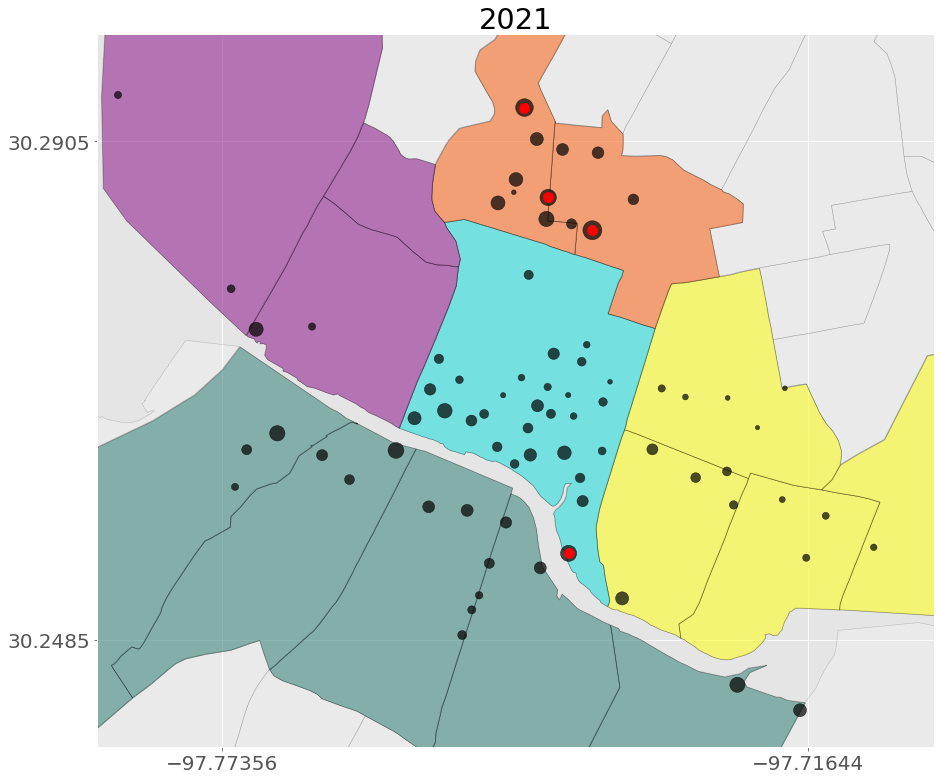

In [36]:
markersize = kiosk_geo['Num_Rides_2021']/200

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#FD5602",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#00D8D8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)

kiosk_geo[kiosk_geo['Kiosk ID'] == 3798].plot(
    ax = ax, color="red",markersize=110, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3793].plot(
    ax = ax, color="red",markersize=110, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2548].plot(
    ax = ax, color="red",markersize=110, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2707].plot(
    ax = ax, color="red",markersize=110, alpha=1)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)
ax.set_xticks([xticklo, xtickhi])
ax.set_yticks([yticklo, ytickhi])

ax.set_title('2021')

# plt.text(-97.70,30.317,"78705",color='r')